# The Sparks Foundation

## Task 2: Predicting Species of Iris plant family using Decision Tree Classifier Supervised ML.

### Name: Haider Ali

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.datasets
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
iris = pd.read_csv('iris.csv')
iris.drop('Id',axis=1,inplace=True)
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,4.9,2.5,4.5,1.7,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Our baseline model is 33 percent accurate.

In [5]:
iris.Species.value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [6]:
iris.Species.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[0,1,2],inplace=True)

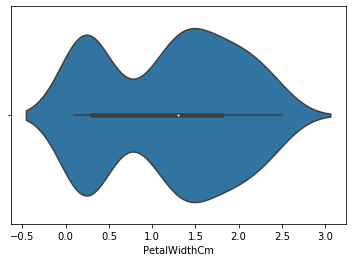

In [10]:
sns.violinplot(iris.PetalWidthCm);

### The voilin plot of Petal shows that there is more *deviation* in PetalWidth than PetalLength.

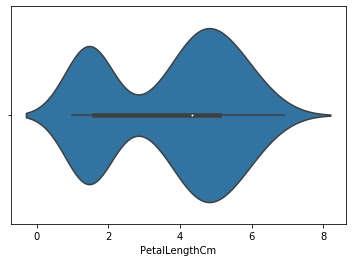

In [9]:
sns.violinplot(iris.PetalLengthCm);

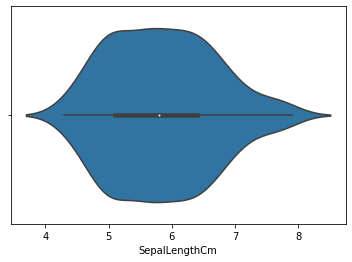

In [7]:
sns.violinplot(iris.SepalLengthCm);

### These Sepal plots shows that SepalLength has more deviation than SepalWidth.

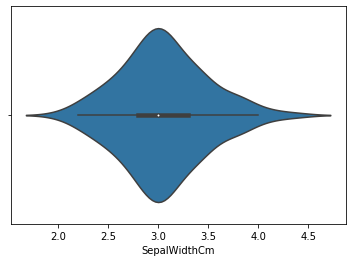

In [8]:
sns.violinplot(iris.SepalWidthCm);

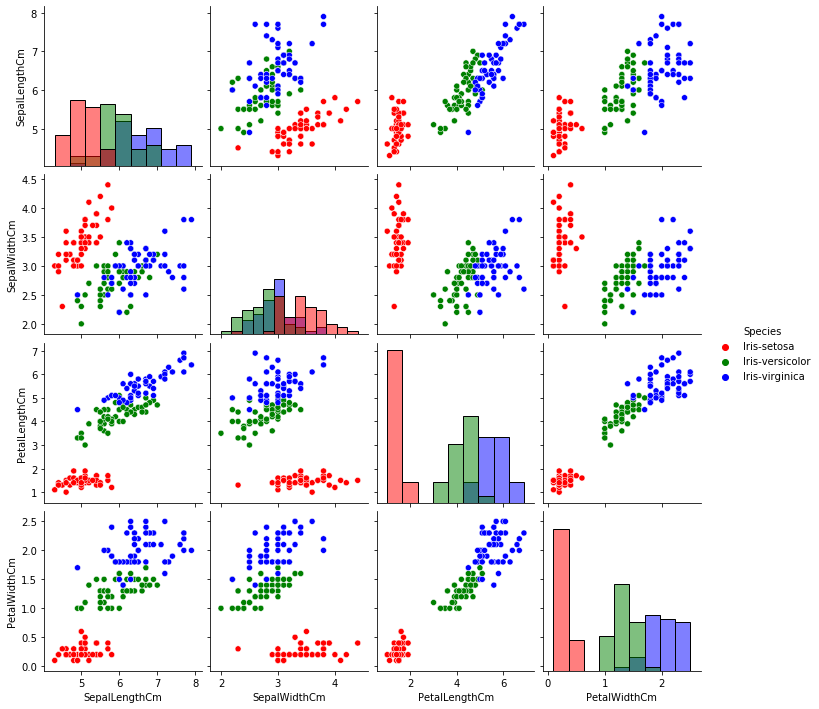

In [42]:
sns.pairplot(iris,hue='Species',palette=['red','green','blue'],diag_kind="hist")

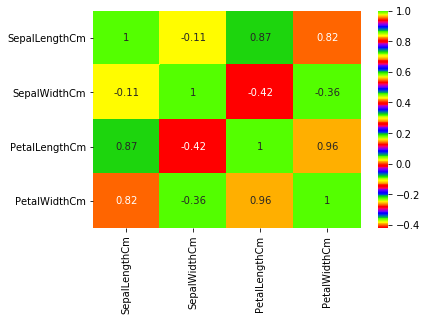

In [43]:
sns.heatmap(iris.corr(),annot=True,cmap='prism');

## From the above pairplot the following conclusions can be made.
1. Petal length and width are not normally distributed so we need to transform them.
2. If the petal length or width  is than 3 it will be belonging to setosa family.

## F(X) ----> ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Creating pipeline .

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dt = DecisionTreeClassifier()
pipe = Pipeline([('Scaler',sc),("Decision Tree",dt)])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

In [47]:
X = iris.drop('Species',axis=1)
y = iris.Species

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

## Pipeline with Scaler and Model.

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier())])

In [49]:
pipe.score(X_train,y_train)

1.0

In [50]:
y_pred = pipe.predict(X_test)
pd.crosstab(y_pred,y_test)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,5,0,0
Iris-versicolor,0,8,0
Iris-virginica,0,0,2


In [51]:
print('Recall Score: ', recall_score(y_pred,y_test,average='weighted'))
print('Precision Score: ', precision_score(y_pred,y_test,average='weighted'))

Recall Score:  1.0
Precision Score:  1.0


## Visualizing Tree

In [52]:
from sklearn.tree import export_text
print(export_text(pipe[1],feature_names=iris.columns[:-1].to_list()))

|--- PetalLengthCm <= -0.75
|   |--- class: Iris-setosa
|--- PetalLengthCm >  -0.75
|   |--- PetalWidthCm <= 0.69
|   |   |--- PetalLengthCm <= 0.65
|   |   |   |--- PetalWidthCm <= 0.56
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalWidthCm >  0.56
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  0.65
|   |   |   |--- PetalWidthCm <= 0.43
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalWidthCm >  0.43
|   |   |   |   |--- PetalLengthCm <= 0.93
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- PetalLengthCm >  0.93
|   |   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  0.69
|   |   |--- PetalLengthCm <= 0.59
|   |   |   |--- SepalLengthCm <= 0.09
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  0.09
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  0.59
|   |   |   |--- class: Iris-virginica



If Petallength > -0.75 and PetalWidth > 0.69 and PeatalLength < 0.59 and SepalWidth <0.06 then the 
plant will be Iris Versicolor.

## Observation

As the test dataset is increased i.e train data is increased the accuracy goes down. 